In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [9]:
dataset = 'D:/MY_FILES/futura/ml/project/pj-DL/data'
classes=['IN-USE-LEG-EXTENSION','IN-USE-PEC-FLY','NOT-IN-USE-LEG-EXTENSION','NOT-IN-USE-PEC-FLY']
classes

['IN-USE-LEG-EXTENSION',
 'IN-USE-PEC-FLY',
 'NOT-IN-USE-LEG-EXTENSION',
 'NOT-IN-USE-PEC-FLY']

In [10]:
datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 rotation_range=20,
                                 validation_split=0.2)
training_set=datagen.flow_from_directory(dataset,
                                         target_size=(128,128),
                                         batch_size=32,
                                         class_mode='categorical',
                                         color_mode='grayscale',
                                         subset="training")

Found 852 images belonging to 4 classes.


In [11]:
validation_set=datagen.flow_from_directory(dataset,
                                           target_size=(128,128),
                                           batch_size=32,
                                           class_mode='categorical',
                                           color_mode='grayscale',
                                           subset="validation")

Found 210 images belonging to 4 classes.


In [12]:
model=Sequential()
model.add(Conv2D(128,(3,3),input_shape=(128,128,1),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(Flatten()) 
model.add(Dense(1024,activation='relu'))
model.add(Dense(4,activation='softmax'))

C:\Users\manus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
training_history=model.fit(x=training_set,validation_data= validation_set,epochs=50)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 121s 4s/step - accuracy: 0.3121 - loss: 1.5750 - val_accuracy: 0.2905 - val_loss: 1.3440
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.3306 - loss: 1.3157 - val_accuracy: 0.3667 - val_loss: 1.3128
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step - accuracy: 0.3753 - loss: 1.2913 - val_accuracy: 0.3667 - val_loss: 1.2789
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 122s 4s/step - accuracy: 0.4321 - loss: 1.1174 - val_accuracy: 0.5571 - val_loss: 0.7293
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.5977 - loss: 0.6911 - val_accuracy: 0.6524 - val_loss: 0.8733
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 129s 4s/step - accuracy: 0.6898 - loss: 0.6511 - val_accuracy: 0.6190 - val_loss: 0.7960
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 126s 4s/step - accuracy: 0.6110 - loss: 0.7447 - val_accuracy: 0.6333 - val_loss: 0.7049
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.7910 - loss: 0.5202 - val_accuracy: 0.7381 - v

In [15]:
hist=training_history.history
hist.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0, 0.5, 'loss')

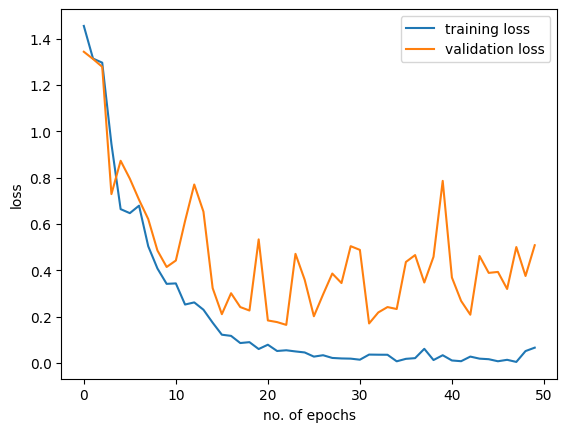

In [16]:
plt.plot(hist['loss'],label='training loss')
plt.plot(hist['val_loss'],label='validation loss')
plt.legend()
plt.xlabel('no. of epochs')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

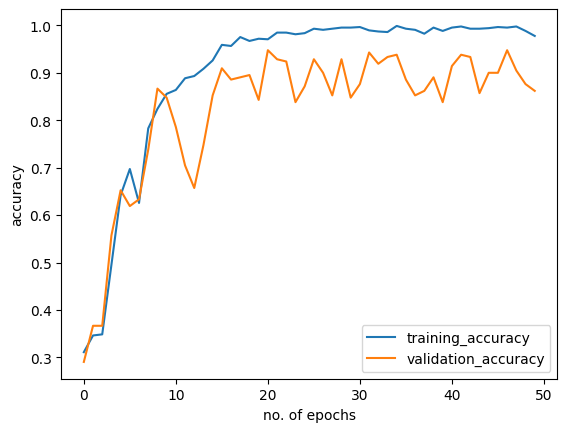

In [17]:
plt.plot(hist['accuracy'],label='training_accuracy')
plt.plot(hist['val_accuracy'],label='validation_accuracy')
plt.legend()
plt.xlabel('no. of epochs')
plt.ylabel('accuracy')

In [18]:
model.save('model.h5')

In [30]:
# import os
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
# dataset = 'D:/MY_FILES/futura/ml/project/pj-DL/data'
# classes=['IN-USE-LEG-EXTENSION','IN-USE-PEC-FLY','NOT-IN-USE-LEG-EXTENSION','NOT-IN-USE-PEC-FLY']
# classes
# model = tf.keras.models.load_model('model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
predicted class NOT-IN-USE-LEG-EXTENSION


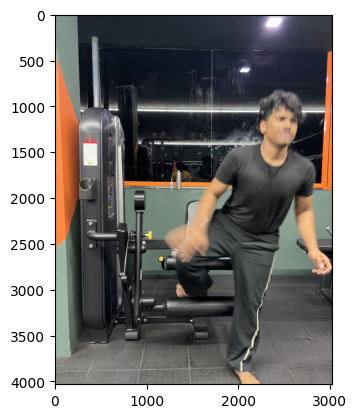

In [31]:
img = cv2.imread('D:/MY_FILES/futura/ml/project/pj-DL/data/NOT-IN-USE-LEG-EXTENSION/2024-07-10 21.37.41 (2).jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

test_image=load_img('D:/MY_FILES/futura/ml/project/pj-DL/data/NOT-IN-USE-LEG-EXTENSION/2024-07-10 21.37.41 (2).jpg',target_size=(128,128),color_mode='grayscale')
test_img_array=img_to_array(test_image)
test_img_array=np.expand_dims(test_img_array,axis=0)
test_img_array.shape
result=model.predict(test_img_array)
predict_classes=np.argmax(result)
predict_classes_name=classes[predict_classes]
print('predicted class',predict_classes_name)